# Piscataway Data Science
Dec-07 2017

<img src="../img/pds.png" align="left" alt="pds">

<font color="blue">
### Prasanna Joshi
Big Data Architect<br>
https://www.linkedin.com/in/prasannajoshi


<font color="blue">
Meetup<br><font color=black>email:</font> gotokermit@gmail.com<br><font color=black>code: </font>github.com/piscataway<br>


In [ ]:
# Agenda

### Presentation Topics @ 1 hour

1. Regularization
2. Random Forest
3. Comparison of Scikit-Learn Logistic Regression Models

### Q&A + Networking @ 1 hour

In [2]:
# 

# 1) Machine learning types

<img src="../img/Figure%201.6.jpg" align="middle" alt="Figure 1.6">

# 2) Choosing the right technique

<img src="../img/ml_map.png" style="width:90%;height:90%" align="left" alt="ml_map">


<img src="../img/ml_map3.png" style="width:90%;height:90%" align="left" alt="ml_map3">
https://twitter.com/thompson_wayne/status/853960000049381376

# 3) Boston housing dataset using Scikit-Learn

In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
boston = load_boston()

In [2]:
# describe the dataset
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
# Split into testing and training data sets
xtrain, xtest, ytrain, ytest = train_test_split(boston.data, boston.target, train_size=0.75, test_size=0.25, random_state=2)

In [4]:
print(boston.data.shape)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(506, 13)
(379, 13)
(379,)
(127, 13)
(127,)


(array([  1.,   0.,   1.,   0.,   4.,   1.,   1.,   3.,   2.,   0.,   3.,
          3.,   4.,   1.,   2.,   6.,   2.,   4.,  12.,   4.,   7.,   6.,
          8.,   6.,   5.,   7.,   6.,   9.,   7.,   6.,  14.,  10.,  15.,
         11.,  14.,   5.,  10.,   9.,  12.,  14.,  17.,  12.,   8.,  12.,
         11.,   1.,   0.,   4.,   2.,   1.,   3.,   4.,   4.,   3.,   2.,
          3.,   2.,   2.,   3.,   3.,   4.,   0.,   6.,   2.,   1.,   0.,
          1.,   1.,   0.,   3.,   0.,   2.,   0.,   1.,   1.,   0.,   0.,
          1.,   0.,   0.,   1.,   1.,   1.,   1.,   1.,   0.,   1.,   0.,
          1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,
         14.]),
 array([  5.  ,   5.45,   5.9 ,   6.35,   6.8 ,   7.25,   7.7 ,   8.15,
          8.6 ,   9.05,   9.5 ,   9.95,  10.4 ,  10.85,  11.3 ,  11.75,
         12.2 ,  12.65,  13.1 ,  13.55,  14.  ,  14.45,  14.9 ,  15.35,
         15.8 ,  16.25,  16.7 ,  17.15,  17.6 ,  18.05,  18.5 ,  18.95,
         19.4 ,  19.85,  20.3 

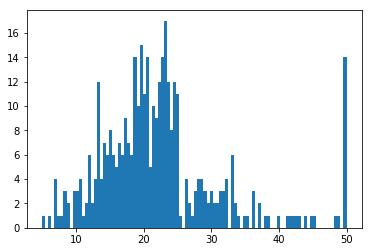

In [5]:
plt.hist(ytrain, bins=100)

In [6]:
from ipywidgets import interact
from scipy import stats

# https://ipywidgets.readthedocs.io/en/latest/

In [7]:
@interact(index=(0, xtrain.shape[1]-1))
def plot_scatter(index):
    fig, ax = plt.subplots()
    x, y = xtrain[:, index], ytrain
    ax.scatter(x,y)
    ax.set_xlabel(boston.feature_names[index])
    ax.set_ylabel("House Price")
    print("Correlation: {0[0]:.1} (p-value: {0[1]:.1})".format(stats.pearsonr(x,y)))


interactive(children=(IntSlider(value=6, description='index', max=12), Output()), _dom_classes=('widget-interact',))

### 3.1) OLS 

In [8]:
from sklearn import linear_model
from sklearn import metrics


In [9]:
lr = linear_model.LinearRegression()
lm = lr.fit(xtrain, ytrain)

yhat = lm.predict(xtest)

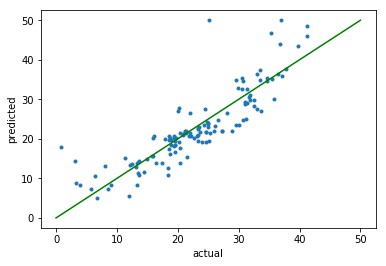

In [10]:
plt.plot(yhat, ytest, '.')
plt.plot([0,50], [0,50],'g-')
plt.xlabel('actual')
plt.ylabel('predicted')

#### Performance Measures

In [11]:
mse = metrics.mean_squared_error(ytest, yhat)
print("MSE of Test Set: ", mse)

rmse = np.sqrt(mse)
print("RMSE of Test Set:", rmse)

r2score = metrics.r2_score(ytest, yhat)
print ("R2 - Coef. of Determination (1=Perfect Fit; 0=No explanatory Power)", r2score)

MSE of Test Set:  22.1769750536
RMSE of Test Set: 4.70924357552
R2 - Coef. of Determination (1=Perfect Fit; 0=No explanatory Power) 0.750122586683


### 3.2) LASSO

In [12]:
import numpy as np
from sklearn import linear_model as linear_model
from sklearn import metrics


In [13]:
# 1)
model = linear_model.Lasso()
lasso = model.fit(xtrain, ytrain)

yhat_train = lasso.predict(xtrain)
yhat_test  = lasso.predict(xtest)
mse_train = metrics.mean_squared_error(ytrain, yhat_train)
mse_test = metrics.mean_squared_error(ytest, yhat_test)
r2score_train = metrics.r2_score(ytrain, yhat_train)
r2score_test = metrics.r2_score(ytest, yhat_test)

print("MSE (Train) :", mse_train)
print("MSE (Test)  :", mse_test)
print ("R2 Score (Train):", r2score_train)
print ("R2 Score (Test) :", r2score_test)

MSE (Train) : 26.8326619219
MSE (Test)  : 26.1673448327
R2 Score (Train): 0.676313819185
R2 Score (Test) : 0.705161392645


In [14]:
# 2) 
model = linear_model.Lasso(alpha=0.1)
lasso = model.fit(xtrain, ytrain)

yhat_train = lasso.predict(xtrain)
yhat_test  = lasso.predict(xtest)
mse_train = metrics.mean_squared_error(ytrain, yhat_train)
mse_test = metrics.mean_squared_error(ytest, yhat_test)
r2score_train = metrics.r2_score(ytrain, yhat_train)
r2score_test = metrics.r2_score(ytest, yhat_test)

print("MSE (Train) :", mse_train)
print("MSE (Test)  :", mse_test)
print ("R2 Score (Train):", r2score_train)
print ("R2 Score (Test) :", r2score_test)

MSE (Train) : 23.0400247825
MSE (Test)  : 23.2355566906
R2 Score (Train): 0.722064935286
R2 Score (Test) : 0.738195096996


In [15]:
# 3)
model = linear_model.Lasso(normalize=True, alpha=0.01)
lasso = model.fit(xtrain, ytrain)

yhat_train = lasso.predict(xtrain)
yhat_test  = lasso.predict(xtest)
mse_train = metrics.mean_squared_error(ytrain, yhat_train)
mse_test = metrics.mean_squared_error(ytest, yhat_test)
r2score_train = metrics.r2_score(ytrain, yhat_train)
r2score_test = metrics.r2_score(ytest, yhat_test)

print("MSE (Train) :", mse_train)
print("MSE (Test)  :", mse_test)
print ("R2 Score (Train):", r2score_train)
print ("R2 Score (Test) :", r2score_test)

MSE (Train) : 23.5723525952
MSE (Test)  : 23.1386256158
R2 Score (Train): 0.715643389889
R2 Score (Test) : 0.739287260656


### 3.3) RIDGE

In [16]:
model = linear_model.Ridge(normalize=True, alpha=.06)
ridge = model.fit(xtrain, ytrain)

yhat_train = ridge.predict(xtrain)
yhat_test  = ridge.predict(xtest)
mse_train = metrics.mean_squared_error(ytrain, yhat_train)
mse_test = metrics.mean_squared_error(ytest, yhat_test)
r2score_train = metrics.r2_score(ytrain, yhat_train)
r2score_test = metrics.r2_score(ytest, yhat_test)

print("MSE (Train) :", mse_train)
print("MSE (Test)  :", mse_test)
print ("R2 Score (Train):", r2score_train)
print ("R2 Score (Test) :", r2score_test)

MSE (Train) : 22.4112809828
MSE (Test)  : 22.2841751775
R2 Score (Train): 0.729649560315
R2 Score (Test) : 0.748914717278


In [17]:
model = linear_model.ARDRegression()
ardr = model.fit(xtrain, ytrain)

yhat_train = ardr.predict(xtrain)
yhat_test  = ardr.predict(xtest)
mse_train = metrics.mean_squared_error(ytrain, yhat_train)
mse_test = metrics.mean_squared_error(ytest, yhat_test)
r2score_train = metrics.r2_score(ytrain, yhat_train)
r2score_test = metrics.r2_score(ytest, yhat_test)

print("MSE (Train) :", mse_train)
print("MSE (Test)  :", mse_test)
print ("R2 Score (Train):", r2score_train)
print ("R2 Score (Test) :", r2score_test)

MSE (Train) : 22.109784137
MSE (Test)  : 22.1427799908
R2 Score (Train): 0.73328655924
R2 Score (Test) : 0.750507877004


### 3.4)  CV

In [18]:
model = linear_model.LassoCV(normalize=True, cv = 20)
lassocv = model.fit(xtrain, ytrain)

yhat_train = lassocv.predict(xtrain)
yhat_test  = lassocv.predict(xtest)
mse_train = metrics.mean_squared_error(ytrain, yhat_train)
mse_test = metrics.mean_squared_error(ytest, yhat_test)
r2score_train = metrics.r2_score(ytrain, yhat_train)
r2score_test = metrics.r2_score(ytest, yhat_test)

print("MSE (Train) :", mse_train)
print("MSE (Test)  :", mse_test)
print ("R2 Score (Train):", r2score_train)
print ("R2 Score (Test) :", r2score_test)

MSE (Train) : 22.0417404215
MSE (Test)  : 22.1581341071
R2 Score (Train): 0.734107380166
R2 Score (Test) : 0.750334875644


### 3.5) RANDOM FOREST REGRESSOR

In [19]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, max_depth=3)
forest = model.fit(xtrain, ytrain)

print(model)

yhat_train = forest.predict(xtrain)
yhat_test  = forest.predict(xtest)
mse_train = metrics.mean_squared_error(ytrain, yhat_train)
mse_test = metrics.mean_squared_error(ytest, yhat_test)
r2score_train = metrics.r2_score(ytrain, yhat_train)
r2score_test = metrics.r2_score(ytest, yhat_test)

print("MSE (Train) :", mse_train)
print("MSE (Test)  :", mse_test)
print ("R2 Score (Train):", r2score_train)
print ("R2 Score (Test) :", r2score_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
MSE (Train) : 10.34938757
MSE (Test)  : 15.4042905147
R2 Score (Train): 0.875153879774
R2 Score (Test) : 0.826433304881


In [20]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(xtrain.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 12 (0.454015)
2. feature 5 (0.423264)
3. feature 7 (0.057600)
4. feature 0 (0.022015)
5. feature 4 (0.015791)
6. feature 6 (0.006870)
7. feature 9 (0.006217)
8. feature 10 (0.006196)
9. feature 11 (0.004084)
10. feature 2 (0.002452)
11. feature 8 (0.001117)
12. feature 1 (0.000354)
13. feature 3 (0.000025)


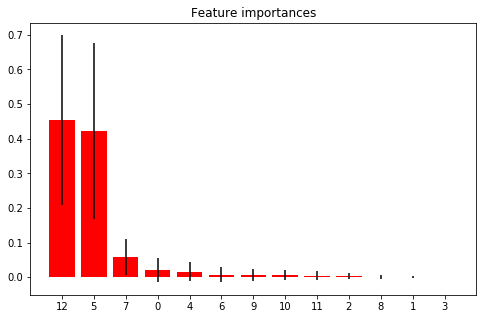

In [21]:
plt.figure(figsize=(8,5))
plt.title("Feature importances")
plt.bar(range(xtrain.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(xtrain.shape[1]), indices)
plt.xlim([-1, xtrain.shape[1]])
plt.show()

## 4) Regularization

In [22]:
import numpy as np

from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
boston = load_boston()

xdata, ydata = datasets.make_regression(n_samples=50, n_features=50, n_informative=10)
xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, train_size=0.75, test_size=0.25)

#### 4.1) OLS

In [23]:
model = linear_model.LinearRegression()
ols   = model.fit(xtrain, ytrain)

yhat_train = ols.predict(xtrain)
yhat_test  = ols.predict(xtest)

mse_train  = metrics.mean_squared_error(ytrain, yhat_train)
mse_test   = metrics.mean_squared_error(ytest, yhat_test)

print("MSE (Train): ", mse_train)
print("MSE (Test) : ", mse_test)
print("Model Score (Train):", model.score(xtrain, ytrain))
print("Model Score (Test) :", model.score(xtest,  ytest))

MSE (Train):  1.3509358133e-25
MSE (Test) :  13797.8145005
Model Score (Train): 1.0
Model Score (Test) : 0.560876763673


#### 4.2) Ridge

In [24]:
model = linear_model.Ridge(alpha=2.5)
ridge = model.fit(xtrain, ytrain)

yhat_train = ridge.predict(xtrain)
yhat_test  = ridge.predict(xtest)

mse_train  = metrics.mean_squared_error(ytrain, yhat_train)
mse_test   = metrics.mean_squared_error(ytest, yhat_test)

print("MSE (Train): ", mse_train)
print("MSE (Test) : ", mse_test)
print("Model Score (Train):", model.score(xtrain, ytrain))
print("Model Score (Test) :", model.score(xtest,  ytest))

MSE (Train):  204.178064479
MSE (Test) :  14005.1988978
Model Score (Train): 0.995688544776
Model Score (Test) : 0.554276638145


#### 4.3) Lasso

In [25]:
model = linear_model.Lasso(alpha=1.0)
lasso = model.fit(xtrain, ytrain)

yhat_train = lasso.predict(xtrain)
yhat_test  = lasso.predict(xtest)

mse_train  = metrics.mean_squared_error(ytrain, yhat_train)
mse_test   = metrics.mean_squared_error(ytest, yhat_test)

print("MSE (Train): ", mse_train)
print("MSE (Test) : ", mse_test)
print("Model Score (Train):", model.score(xtrain, ytrain))
print("Model Score (Test) :", model.score(xtest,  ytest))

MSE (Train):  15.2401636023
MSE (Test) :  20.8617891236
Model Score (Train): 0.999678186375
Model Score (Test) : 0.999336061783


In [26]:
alphas = np.logspace(-4, 3, 200)
#alphas = np.linspace(-0.9, 0.9, 200)
coeffs = np.zeros((len(alphas), xtrain.shape[1]))
mse_train = np.zeros_like(alphas)
mse_test = np.zeros_like(alphas)

for n, alpha in enumerate(alphas):
    model = linear_model.Lasso(alpha=alpha, tol=0.001)
    #model = linear_model.Ridge(alpha=alpha)
    model.fit(xtrain, ytrain)
    coeffs[n, :] = model.coef_
    mse_train[n] = metrics.mean_squared_error(ytrain, model.predict(xtrain))
    mse_test[n] = metrics.mean_squared_error(ytest, model.predict(xtest))
    

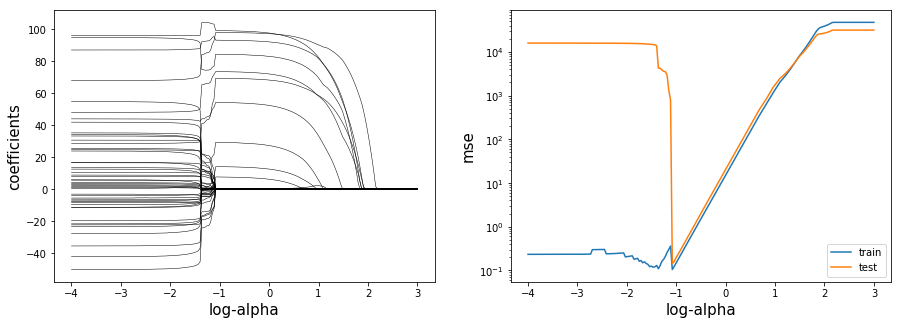

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
for n in range(coeffs.shape[1]):
    axes[0].plot(np.log10(alphas), coeffs[:, n], color='k', lw=0.5)
    #axes[0].plot(alphas, coeffs[:, n], color='k', lw=0.5)
        
#axes[1].semilogy(alphas, mse_train, label="train")
axes[1].semilogy(np.log10(alphas), mse_train, label="train")
#axes[1].semilogy(alphas, mse_test, label="test")
axes[1].semilogy(np.log10(alphas), mse_test, label="test")
axes[1].legend(loc=0)

axes[0].set_xlabel("log-alpha", fontsize=15)
axes[0].set_ylabel("coefficients", fontsize=15)

axes[1].set_xlabel("log-alpha", fontsize=15)
axes[1].set_ylabel(r"mse", fontsize=15)

In [28]:
# LASSO-CV

model = linear_model.LassoCV()
lassocv = model.fit(xdata, ydata)

yhat_train = lassocv.predict(xtrain)
yhat_test  = lassocv.predict(xtest)
yhat_data  = lassocv.predict(xdata)

mse_train  = metrics.mean_squared_error(ytrain, yhat_train)
mse_test   = metrics.mean_squared_error(ytest, yhat_test)
mse_data   = metrics.mean_squared_error(ydata, yhat_data)

print("MSE (Train): ", mse_train)
print("MSE (Test) : ", mse_test)
print("MSE (Data) : ", mse_data)
print("Model Score (Train):", model.score(xtrain, ytrain))
print("Model Score (Test) :", model.score(xtest,  ytest))
print("Model Score (Data) :", model.score(xdata,  ydata))

MSE (Train):  0.282325369318
MSE (Test) :  0.205230760238
MSE (Data) :  0.262280770957
Model Score (Train): 0.999994038374
Model Score (Test) : 0.999993468415
Model Score (Data) : 0.999993932518


In [29]:
print("Alpha = ", model.alpha_)
print("Log-Alpha = " , np.log10(model.alpha_))

Alpha =  0.130252952693
Log-Alpha =  -0.885212422931


In [30]:
# ELASTICNET-CV

model = linear_model.ElasticNetCV()
elasticnetcv = model.fit(xdata, ydata)

yhat_data  = elasticnetcv.predict(xdata)
mse_data   = metrics.mean_squared_error(ydata, yhat_data)

print("MSE (Data) : ", mse_data)
print("Model Score (Data) :", model.score(xdata,  ydata))


MSE (Data) :  888.589637034
Model Score (Data) : 0.979443776881


In [31]:
print(model.alpha_)
print(model.l1_ratio)


0.260505905387
0.5


In [32]:
# .. keep exploring!